# Séparation des jeux de données d'entraînement et de tests

In [2]:
from ift6758.data import load_cached_seasons_dataframe, load_cached_season_dataframe, new_variables

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="ticks")

In [2]:
df_training = load_cached_seasons_dataframe(2016,2019) 
df_test = load_cached_season_dataframe(2020) # on y touche pas jusqu'à la fin
# len(df_test)

## Pour trouver la distance correctement, on reprend les fonctions de notre notebook simple_viz qui trouvaient le côté d'attaque des équipes pour savoir sur quel but on tire.


# Histogramme des tirs cadrés (buts et non-buts) par distance

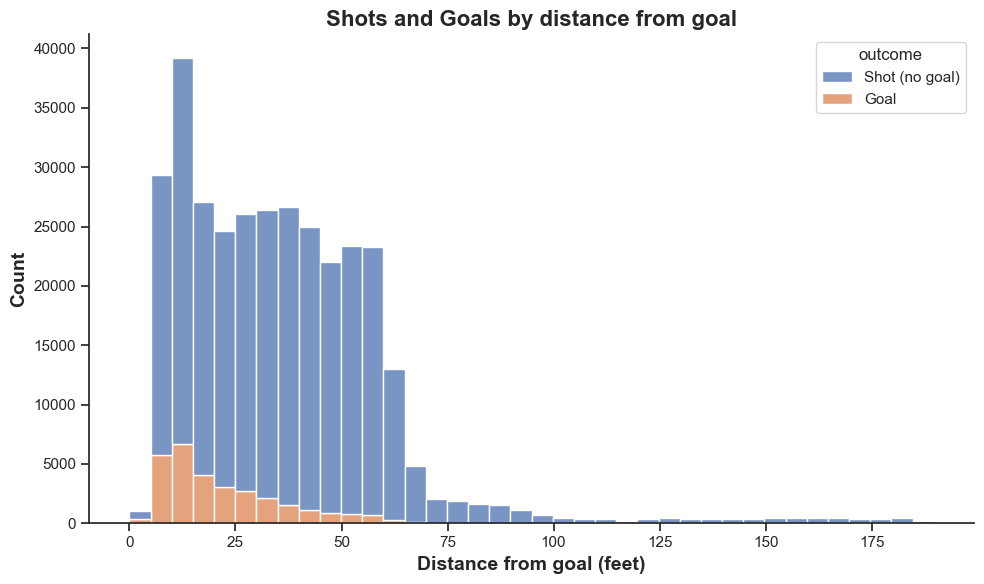

In [5]:
df = new_variables(df_training)

# On veut 2 catégories : Goal vs Shot (non-goal)
df["outcome"] = np.where(df["isGoal"], "Goal", "Shot (no goal)")

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df,
    x="shotDistance",
    hue="outcome",
    multiple="stack",
    binwidth=5
)

sns.despine()
ax.grid(False)
ax.set_title("Shots and Goals by distance from goal", fontsize=16, fontweight="bold")
ax.set_xlabel("Distance from goal (feet)", fontsize=14, fontweight="bold")
ax.set_ylabel("Count", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Histogramme des tirs cadrés (buts et non-buts) par angle de tir

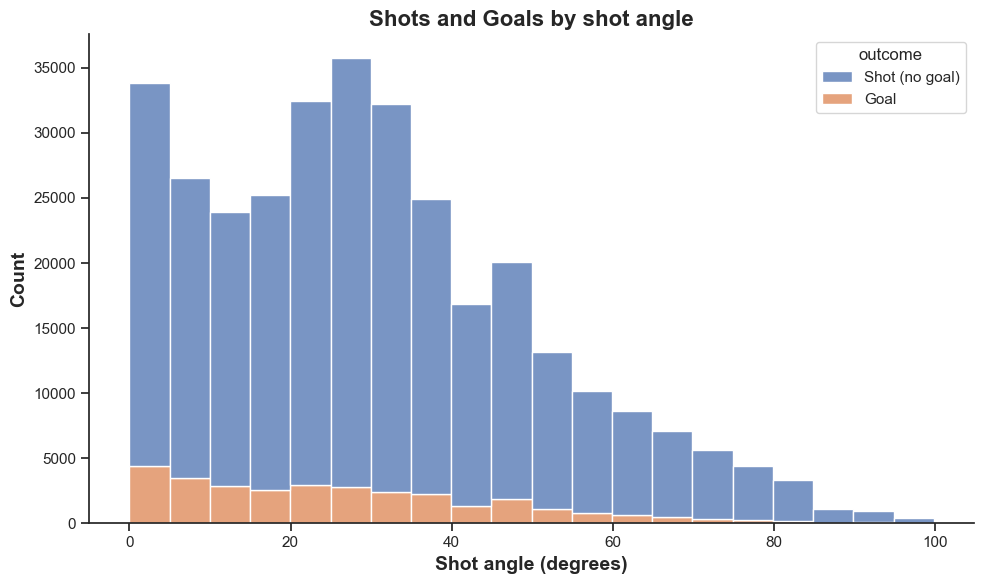

In [6]:
df_angle = df[df["shotAngle"].between(0, 100)].copy()

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df_angle,
    x="shotAngle",
    hue="outcome",
    multiple="stack",
    binwidth=5
)

sns.despine()
ax.grid(False)
ax.set_title("Shots and Goals by shot angle", fontsize=16, fontweight="bold")
ax.set_xlabel("Shot angle (degrees)", fontsize=14, fontweight="bold")
ax.set_ylabel("Count", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Histogramme 2D de la densité des tirs en fonction de la distance et de l’angle

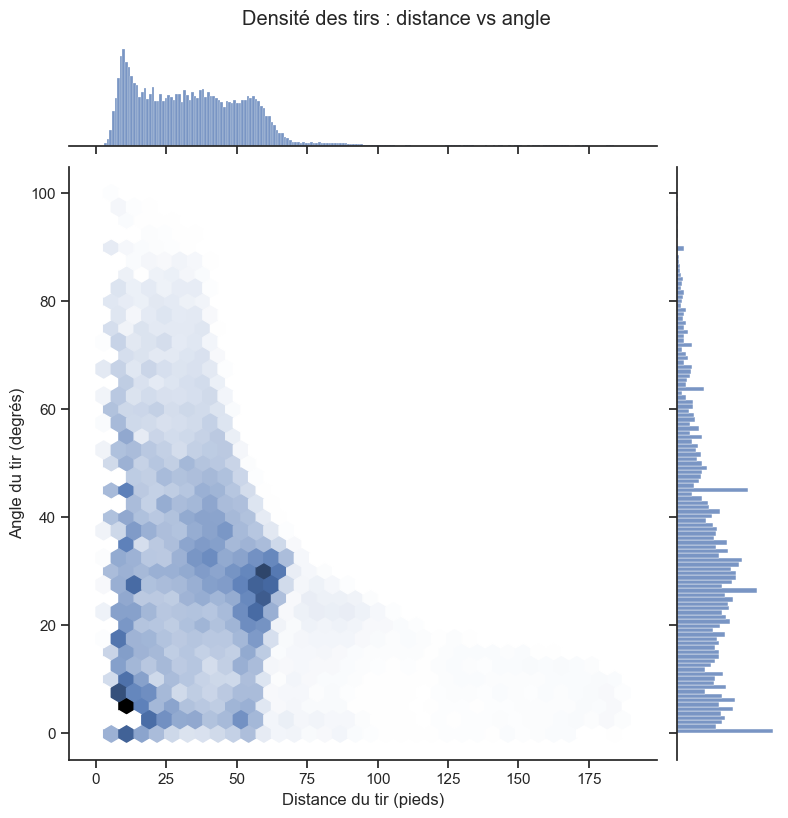

In [7]:
df_all = df.copy()
df_all = df_all[df_all["shotAngle"].between(0, 100)]

g = sns.jointplot(
    data=df_all,
    x="shotDistance",
    y="shotAngle",
    kind="hex",
    gridsize=35,
    height=8
)

g.set_axis_labels("Distance du tir (pieds)", "Angle du tir (degrés)")
g.fig.suptitle("Densité des tirs : distance vs angle", y=1.02)
plt.show()

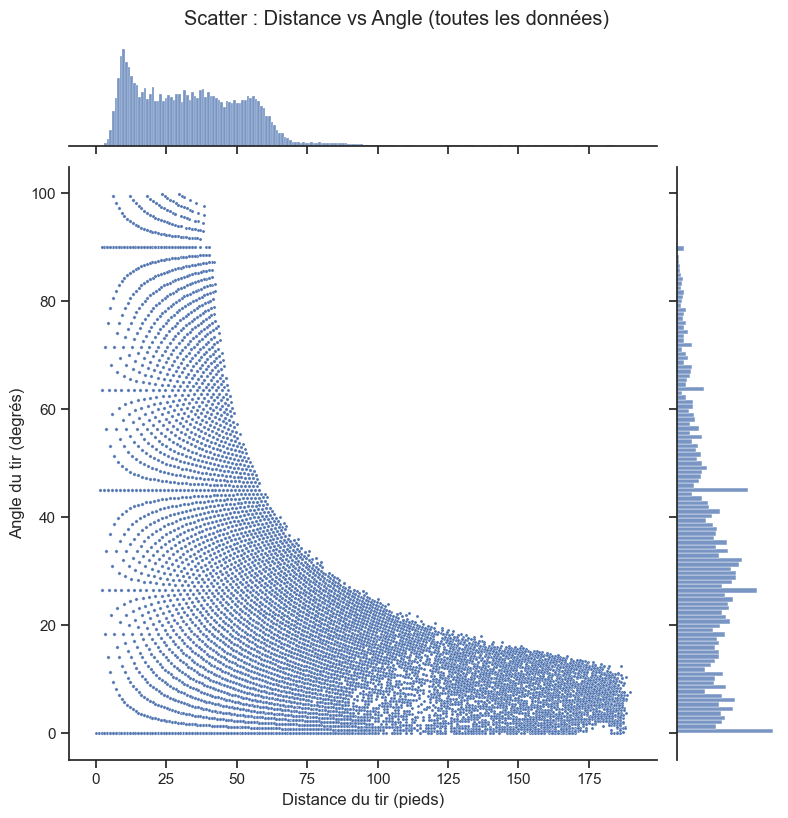

In [8]:
# si on trouve ca plus cool ?
df_scatter = df.copy()
df_scatter = df_scatter[df_scatter["shotAngle"].between(0, 100)]

g = sns.jointplot(
    data=df_scatter,
    x="shotDistance",
    y="shotAngle",
    kind="scatter",
    joint_kws={
        "s": 5, 
        "alpha": 1     
    },
    height=8
)

g.set_axis_labels("Distance du tir (pieds)", "Angle du tir (degrés)")
g.fig.suptitle("Scatter : Distance vs Angle (toutes les données)", y=1.02)
plt.show()

# Taux de but en fonction de la distance

C:\Users\stefa\AppData\Local\Temp\ipykernel_29760\3393310902.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("distance_bin")
C:\Users\stefa\AppData\Local\Temp\ipykernel_29760\3393310902.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["typeEvent"] == "goal").sum() * 100 / len(x))


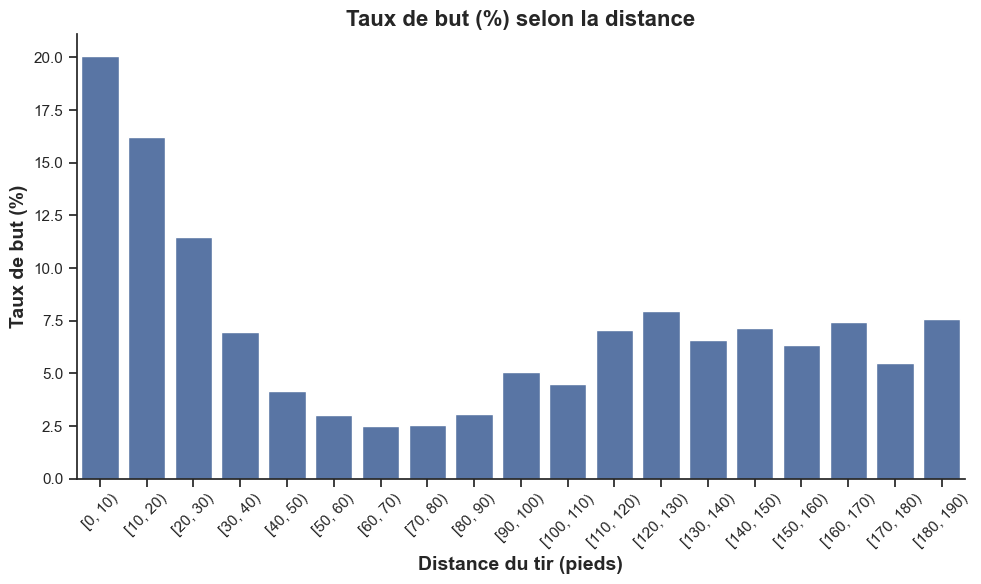

In [9]:
df = df.copy()

bin_width = 10
bins = range(0, int(df["shotDistance"].max()) + bin_width, bin_width)
df["distance_bin"] = pd.cut(df["shotDistance"], bins=bins, right=False)

success_rate = (
    df.groupby("distance_bin")
      .apply(lambda x: (x["typeEvent"] == "goal").sum() * 100 / len(x))
      .reset_index(name="success_rate")
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=success_rate, x="distance_bin", y="success_rate")
sns.despine()
ax.grid(False)
ax.set_title("Taux de but (%) selon la distance", fontsize=16, fontweight="bold")
ax.set_xlabel("Distance du tir (pieds)", fontsize=14, fontweight="bold")
ax.set_ylabel("Taux de but (%)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Taux de but en fonction de l'angle de tir

C:\Users\stefa\AppData\Local\Temp\ipykernel_29760\340077753.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("angle_bin")
C:\Users\stefa\AppData\Local\Temp\ipykernel_29760\340077753.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["typeEvent"] == "goal").sum() * 100 / len(x))


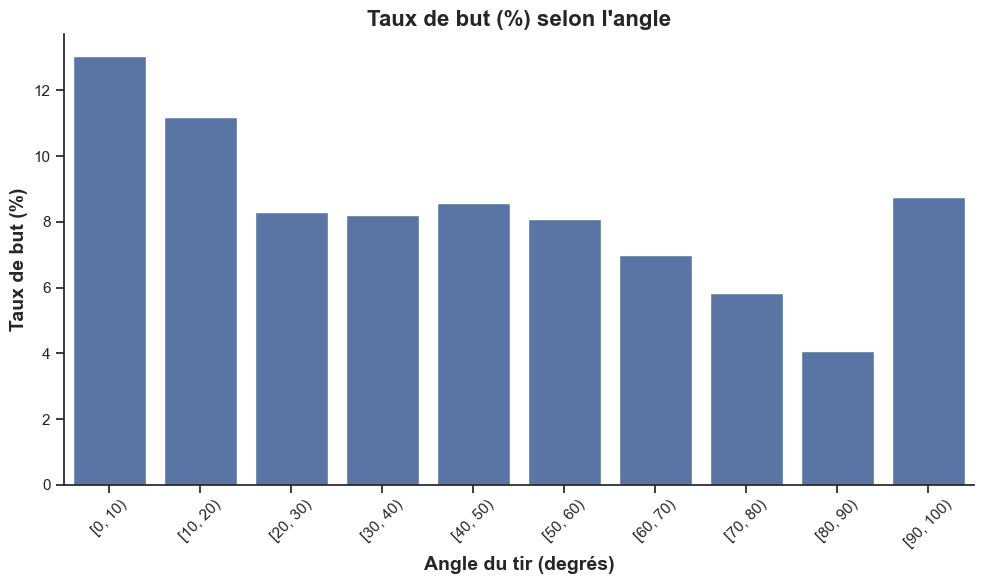

In [10]:
df = df.copy()
df = df[df["shotAngle"].between(0, 100)]

bin_width = 10
bins = range(0, 100 + bin_width, bin_width)
df["angle_bin"] = pd.cut(df["shotAngle"], bins=bins, right=False)

success_rate = (
    df.groupby("angle_bin")
      .apply(lambda x: (x["typeEvent"] == "goal").sum() * 100 / len(x))
      .reset_index(name="success_rate")
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=success_rate, x="angle_bin", y="success_rate")
sns.despine()
ax.grid(False)
ax.set_title("Taux de but (%) selon l'angle", fontsize=16, fontweight="bold")
ax.set_xlabel("Angle du tir (degrés)", fontsize=14, fontweight="bold")
ax.set_ylabel("Taux de but (%)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogramme du taux de succès, pour un but vide ou pas

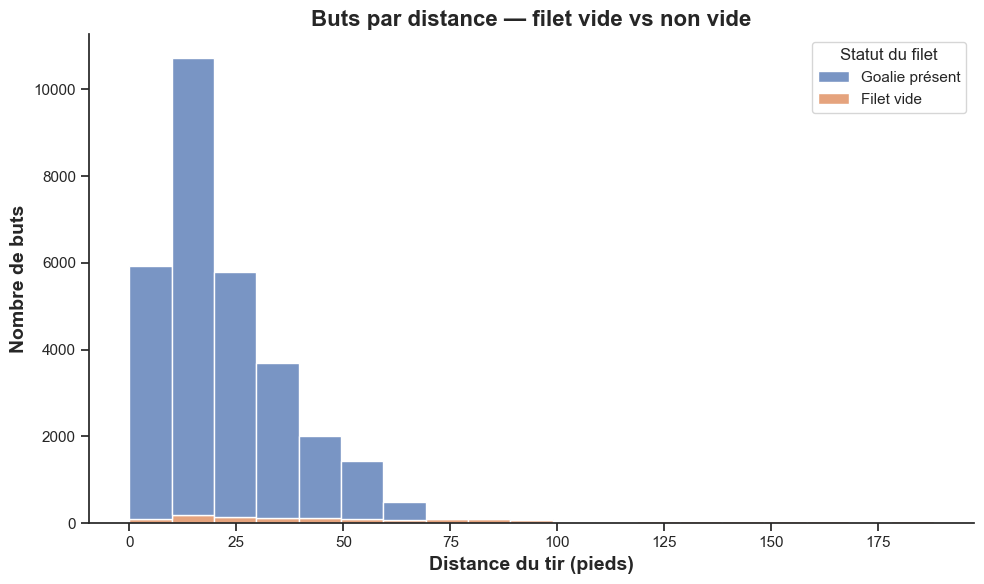

In [11]:
df_goals = df[df["typeEvent"] == "goal"].copy()

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df_goals,
    x="shotDistance",
    hue="isEmpty",          # False/True
    multiple="stack",
    binwidth=10
)

sns.despine()
ax.grid(False)
ax.set_title("Buts par distance — filet vide vs non vide", fontsize=16, fontweight="bold")
ax.set_xlabel("Distance du tir (pieds)", fontsize=14, fontweight="bold")
ax.set_ylabel("Nombre de buts", fontsize=14, fontweight="bold")

leg = ax.get_legend()
if leg is not None:
    leg.set_title("Statut du filet")
    for t in leg.texts:
        if t.get_text() in ["False", "0"]:
            t.set_text("Goalie présent")
        elif t.get_text() in ["True", "1"]:
            t.set_text("Filet vide")

plt.tight_layout()
plt.show()

C:\Users\stefa\AppData\Local\Temp\ipykernel_29760\1401360021.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_goals.groupby(["distance_bin", "isEmpty"], as_index=False)


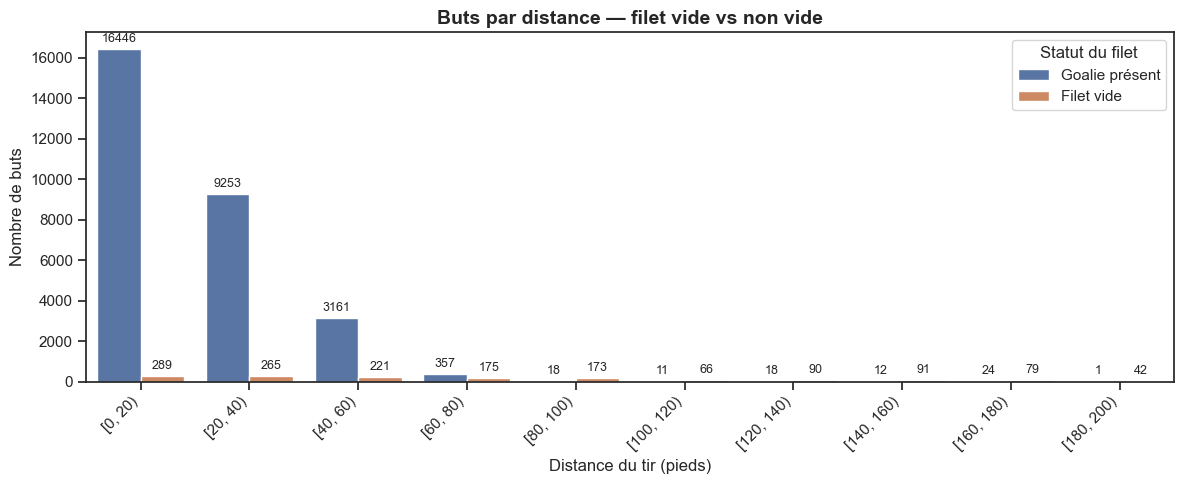

In [12]:
df_goals = df[df["typeEvent"] == "goal"].copy()
df_goals["isEmpty"] = df_goals["openNet"].fillna(False).astype(bool)

bin_width = 20
max_d = int(np.ceil(df_goals["shotDistance"].max() / bin_width) * bin_width)
bins = np.arange(0, max_d + bin_width, bin_width)

df_goals["distance_bin"] = pd.cut(df_goals["shotDistance"], bins=bins, right=False)

counts = (
    df_goals.groupby(["distance_bin", "isEmpty"], as_index=False)
            .size()
            .rename(columns={"size": "n_goals"})
)
counts["distance_bin"] = counts["distance_bin"].astype(str)

plt.figure(figsize=(12, 5))
ax = sns.barplot(
    data=counts,
    x="distance_bin",
    y="n_goals",
    hue="isEmpty"
)

ax.set_title("Buts par distance — filet vide vs non vide", fontsize=14, fontweight="bold")
ax.set_xlabel("Distance du tir (pieds)")
ax.set_ylabel("Nombre de buts")
plt.xticks(rotation=45, ha="right")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Goalie présent", "Filet vide"], title="Statut du filet", loc="upper right")

# Afficher les valeurs au-dessus des barres parce que c'est impossible à voir sinon
for p in ax.patches:
    h = p.get_height()
    if np.isnan(h) or h == 0:
        continue
    ax.annotate(
        f"{int(h)}",
        (p.get_x() + p.get_width() / 2, h),
        ha="center",
        va="bottom",
        fontsize=9,
        xytext=(0, 3),
        textcoords="offset points"
    )

plt.tight_layout()
plt.show()